# Analyzing the Yelp reviews data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
yelp_df = pd.read_csv('yelp.csv')

In [3]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp_df.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [5]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [7]:
yelp_df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

# Visualizing the Data

In [8]:
yelp_df['length'] = yelp_df['text'].apply(len)

In [9]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


<Axes: ylabel='Frequency'>

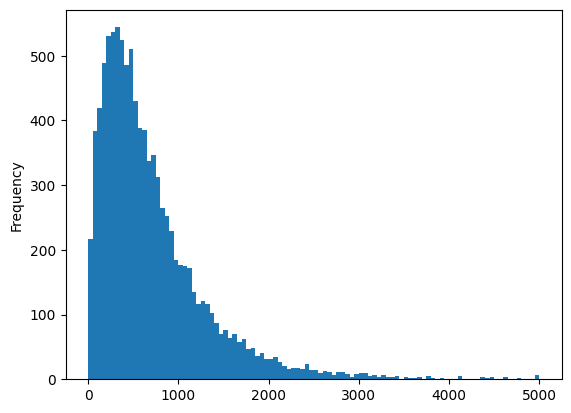

In [11]:
#length of the text
yelp_df['length'].plot(bins= 100, kind= 'hist')

In [12]:
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [19]:
print(yelp_df['length'].max())

4997


In [18]:
yelp_df[ yelp_df['length'] == yelp_df['length'].max()]['text']

55    In our continuing quest to identify cool, loca...
Name: text, dtype: object

In [20]:
yelp_df['stars'].value_counts()

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64

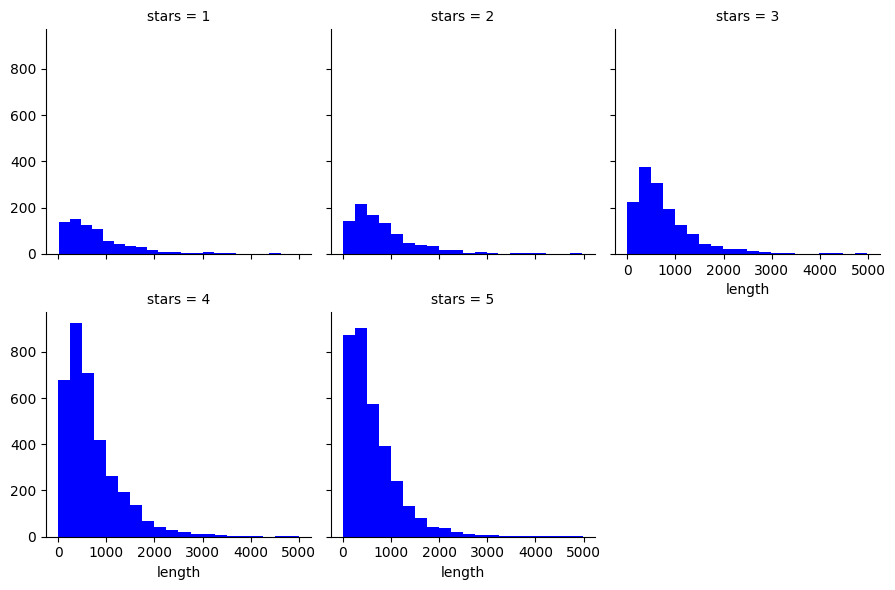

In [22]:
g = sns.FacetGrid(data=yelp_df, col='stars', col_wrap=3)
g.map(plt.hist, 'length', bins = 20, color = 'b')

In [26]:
one_star = yelp_df[yelp_df['stars'] == 1]
five_star = yelp_df[yelp_df['stars'] == 5]

In [27]:
five_star.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [32]:
one_five_star = pd.concat([one_star, five_star])

In [33]:
one_five_star.shape

(4086, 11)

In [34]:
print(" one star review pecent : ", (len(one_star)/len(one_five_star))*100)

 one star review pecent :  18.330885952031327


In [36]:
print("five  star review percent : ", (len(five_star)/len(one_five_star))*100)

five  star review percent :  81.66911404796868


<Axes: xlabel='stars', ylabel='count'>

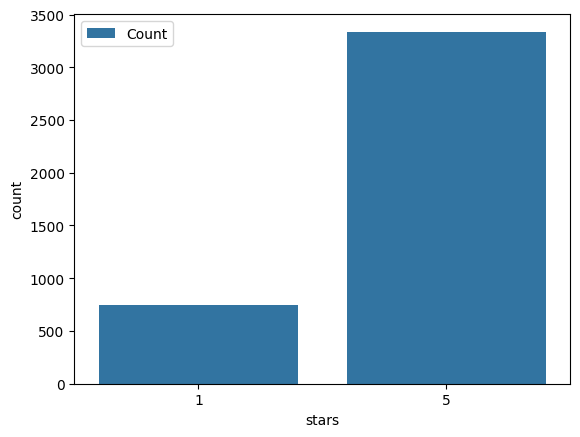

In [38]:
sns.countplot(x = one_five_star['stars'], label = "Count")

- remove punctuation
- remove stopwords

In [55]:
import string
import nltk
from nltk.corpus import stopwords

In [57]:
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mavis021/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [58]:
stopwords.words('english')[0:10]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [59]:
def message_text_process(mess):
    no_punctuation = [char for char in mess if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

In [60]:
yelp_df_clean = one_five_star['text'].apply(message_text_process)

In [62]:
print("cleaned review : ", yelp_df_clean[0]), print("original review : ", one_five_star['text'][0])

cleaned review :  ['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']
original review :  My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an abs

(None, None)

In [64]:
# mean data
one_five_star[ one_five_star['length'] == 662]['text']

3571    Coming from a French family on my mom's side i...
7169    Habaneros is an awesome little gem stuck in th...
Name: text, dtype: object

In [65]:
print("cleaned review : ", yelp_df_clean[3571]), print("original review : ", one_five_star['text'][3571])

cleaned review :  ['Coming', 'French', 'family', 'moms', 'side', 'ingrained', 'genes', 'love', 'cooking', 'food', 'shops', 'like', 'Sur', 'La', 'Tableoh', 'also', 'wine', 'cheesewhat', 'tough', 'life', 'live', 'Sur', 'La', 'Table', 'classy', 'cooking', 'shop', 'offers', 'high', 'end', 'cooking', 'ware', 'appliances', 'also', 'dishes', 'Somethings', 'store', 'pricey', 'also', 'find', 'good', 'deals', 'well', 'offer', 'many', 'cooking', 'things', 'wouldnt', 'find', 'average', 'Crate', 'Barrel', 'complicated', 'cooking', 'endeavors', 'also', 'found', 'cute', 'cookie', 'cutters', 'moms', 'collection', 'staff', 'helpful', 'knowledgeable', 'many', 'Sur', 'La', 'Tables', 'offer', 'cooking', 'classes']
original review :  Coming from a French family on my mom's side it is ingrained in my genes to love cooking, food, and shops like Sur La Table...oh and also wine and cheese...what a tough life I live!

Sur La Table is a classy cooking shop which offers high end cooking ware, appliances, and also

(None, None)

# Countvectorizer

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer = message_text_process).fit(one_five_star['text'])

In [71]:
print(bow_transformer.vocabulary_)

{'U': 8238, 'go': 15446, 'n': 18911, 'check': 11374, 'car': 11086, 'u': 25122, 'wanna': 25773, 'buy': 10917, '1': 13, 'Thats': 7987, 'wrong': 26268, 'move': 18805, 'even': 14106, 'want': 25776, 'service': 22450, 'made': 18055, 'biggest': 10276, 'mistake': 18624, 'ur': 25418, 'life': 17696, 'time': 24623, 'asked': 9656, 'girlfriend': 15376, 'take': 24154, 'oil': 19354, 'guess': 15754, 'ripped': 21801, 'lying': 18031, 'bad': 9902, 'without': 26144, 'fixing': 14695, 'problem': 20785, 'Might': 5393, 'bring': 10705, 'serious': 22430, 'accident': 8934, 'said': 22000, '4': 420, 'brand': 10616, 'new': 19039, 'tires': 24670, 'timing': 24644, 'belt': 10200, 'brake': 10611, 'pads': 19733, 'know': 17391, 'whys': 26045, 'worst': 26228, 'changed': 11319, '2': 244, 'months': 18740, 'trashy': 24911, 'dealer': 12799, 'People': 6209, 'better': 10239, 'somewhere': 23120, 'Disgusting': 2762, 'Groupon': 3806, 'daughter': 12765, 'tried': 24972, 'outdated': 19572, 'gaudy': 15281, '80s': 617, 'style': 23791, 

In [74]:
print(len(bow_transformer.vocabulary_))

26435


# Training the Model

In [75]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = one_five_star['stars'].values

In [76]:
NB_classifier.fit(bow_transformer.transform(one_five_star['text']), label)

MultinomialNB()

In [83]:
testing_sample = ['amazing food!']

testing_sample = bow_transformer.transform(testing_sample)
test_pridict = NB_classifier.predict(testing_sample)

print(test_pridict)

[5]


train test data

In [84]:
X = bow_transformer.transform(one_five_star['text'])
y = label

In [85]:
X.shape, y.shape

((4086, 26435), (4086,))

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [87]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

Evaluating the model

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([1, 5, 5, ..., 5, 5, 5])

<Axes: >

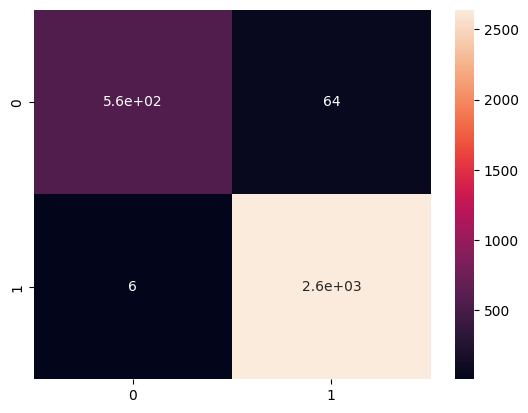

In [89]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

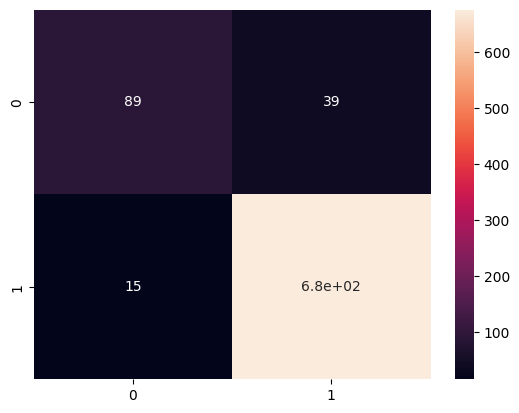

In [90]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [91]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.86      0.70      0.77       128
           5       0.95      0.98      0.96       690

    accuracy                           0.93       818
   macro avg       0.90      0.84      0.86       818
weighted avg       0.93      0.93      0.93       818



# TF-IDF
Term Frequency-Inverse Document Frequency is a numerical statistic used to reflect how important a word is to a document in a collection or corpus of documents.  
- TF is the number of times the 'word' appears in a document / Total number of terms in the document  
- IDF is log_e(Total number of documents / Number of documents with the term 'word' in it)

In [93]:
from sklearn.feature_extraction.text import TfidfTransformer
yelp_tfidf = TfidfTransformer().fit(X)
print(len(yelp_tfidf.idf_))

26435


In [95]:
yelp_tfidf

TfidfTransformer()

In [97]:
yelp_tfidf.idf_

array([6.83065983, 8.6224193 , 8.6224193 , ..., 8.6224193 , 8.6224193 ,
       8.6224193 ])

In [103]:
print(yelp_tfidf.transform(X))

  (0, 13)	0.15770246070234636
  (0, 244)	0.06662808805692144
  (0, 420)	0.15422766289715872
  (0, 5393)	0.1327453009849652
  (0, 6209)	0.1141876795265311
  (0, 7987)	0.09269421946314724
  (0, 8238)	0.4055847250304861
  (0, 8934)	0.13519490834349535
  (0, 9656)	0.07219908271873936
  (0, 9902)	0.06812247323449432
  (0, 10200)	0.1269033293873733
  (0, 10239)	0.06057181872889291
  (0, 10276)	0.1178689443031794
  (0, 10611)	0.1507384223657568
  (0, 10616)	0.10911986520282375
  (0, 10705)	0.08063615989954115
  (0, 10917)	0.08322016203495267
  (0, 11086)	0.3420650219404802
  (0, 11319)	0.10065657074960206
  (0, 11374)	0.07454031874473717
  (0, 12799)	0.14136742591085175
  (0, 14106)	0.053664531653196075
  (0, 14695)	0.1269033293873733
  (0, 15376)	0.21240370879621392
  (0, 15446)	0.08893343476250612
  :	:
  (4085, 14423)	0.10064506371832901
  (4085, 14480)	0.08518302578980794
  (4085, 14689)	0.13505937049458547
  (4085, 15041)	0.08518302578980794
  (4085, 15626)	0.056073903602148346
  (4085, 

<Axes: >

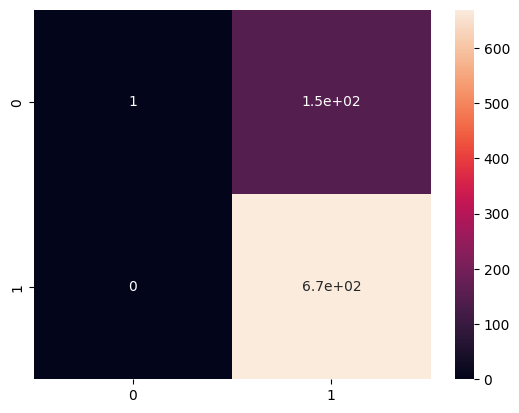

In [104]:
X = yelp_tfidf.transform(X)
y = label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

y_predict_test = NB_classifier.predict(X_test)
y_predict_test

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)